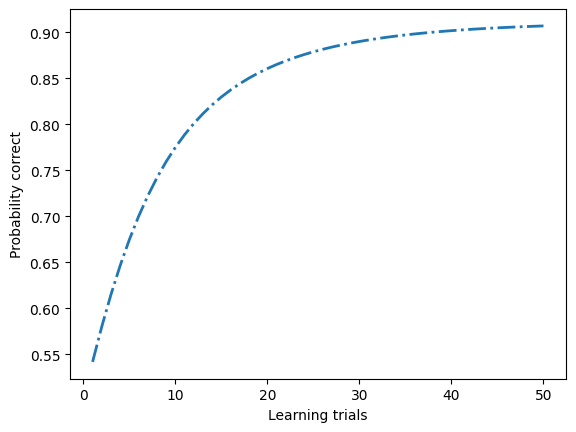

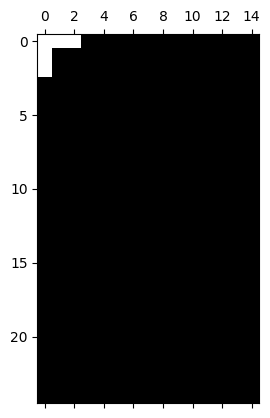

Proportion of correct patterns: 0.9866666666666667


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from files
def load_data():
    XAC_1 = np.loadtxt('XAC_1.txt')
    XAC_2 = np.loadtxt('XAC_2.txt')
    XBC_1 = np.loadtxt('XBC_1.txt')
    XBC_2 = np.loadtxt('XBC_2.txt')
    stimuli1 = np.load('stimuli1.npy', allow_pickle=True).item()
    stimuli2 = np.load('stimuli2.npy', allow_pickle=True).item()
    return XAC_1, XAC_2, XBC_1, XBC_2, stimuli1, stimuli2

# Input-output function
def in_out(I1, I2, X, W, sig, st):
    in1 = 1 / np.exp(((I1 - X[st, 0]) / sig)**2)
    in2 = 1 / np.exp(((I2 - X[st, 1]) / sig)**2)
    In = np.kron(in1, in2)
    In = (In / np.sum(In)).reshape(-1, 1)
    Out = W @ In
    return In, Out

# Exemplar function
def exemplar(alf, b, sig, XAC, XBC, P, nr, cutoff):
    ns = XAC.shape[0]
    Max = int(np.round(np.max(XAC)))
    I1 = np.arange(Max + 1)
    I2 = np.arange(Max + 1)
    W = np.zeros((2, (Max + 1)**2))
    T = np.zeros((nr, 4))
    mT = np.zeros(nr)

    for rep in range(nr):
        for st in range(ns):
            In, Out = in_out(I1, I2, XAC, W, sig, st)
            WA = alf * (np.array([[1], [0]]) - Out) @ In.T
            W += WA

            In, Out = in_out(I1, I2, XBC, W, sig, st)
            WB = alf * (np.array([[0], [1]]) - Out) @ In.T
            W += WB

        for st in range(4):
            In, Out = in_out(I1, I2, P, W, sig, st)
            if st in [1, 2]:
                pa = np.exp(b * Out) / np.sum(np.exp(b * Out))
                T[rep, st] = pa[0, 0]
            else:
                pb = np.exp(b * Out) / np.sum(np.exp(b * Out))
                T[rep, st] = pb[0, 0]

        mT[rep] = ((T[rep, 1] - T[rep, 0]) > cutoff) & ((T[rep, 2] - T[rep, 3]) > cutoff)

    return mT, T

# Main program
def main():
    XAC_1, XAC_2, XBC_1, XBC_2, stimuli1, stimuli2 = load_data()
    
#     XAC = XAC_1  # Change as needed
#     XBC = XBC_1  # Change as needed
#     P = stimuli1['P']  # Assuming stimuli1 contains a dictionary

    XAC = XAC_2  # Change as needed
    XBC = XBC_2  # Change as needed
    P = stimuli2['P']  # Assuming stimuli1 contains a dictionary
    
    nr = 50
    aa = 25
    AV = np.arange(1, aa + 1) / aa
    bb = 15
    BV = np.arange(1, bb + 1)
    MT = np.zeros((aa, bb))
    sig = 5
    cutoff = 0.2

    # Single parameter setting
    alf = 1.0
    b = 2.5
    Mt, Pc = exemplar(alf, b, sig, XAC, XBC, P, nr, cutoff)

    plt.figure()
    plt.plot(range(1, nr + 1), (Pc[:, 1] + Pc[:, 2]) / 2, '-.', linewidth=2)
    plt.xlabel('Learning trials')
    plt.ylabel('Probability correct')
    plt.show()

    # Loop through predictions
    for i in range(aa):
        for j in range(bb):
            alf = AV[i]
            b = BV[j]
            mT, _ = exemplar(alf, b, sig, XAC, XBC, P, nr, cutoff)
            MT[i, j] = mT[-1]

    plt.figure()
    plt.spy(MT)
    plt.show()

    pcp = np.sum(MT == 1) / (MT.shape[0] * MT.shape[1])
    print('Proportion of correct patterns:', pcp)

if __name__ == "__main__":
    main()


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stimuli(XAC, XBC, XAR, XBR, P):
    plt.figure(figsize=(10, 5))

    # Categorization plot
    plt.subplot(1, 2, 1)
    plt.scatter(XAC[:, 0], XAC[:, 1], marker='+', label='A')
    plt.scatter(XBC[:, 0], XBC[:, 1], marker='o', label='B')
    plt.legend()
    plt.xlim(-2, 15)
    plt.ylim(-2, 15)
    plt.title('Categorization')
    plt.grid(True)  # Add grid

    # Generalization plot
    plt.subplot(1, 2, 2)
    plt.scatter(XAR[:, 0], XAR[:, 1], marker='+', label='A')
    plt.scatter(XBR[:, 0], XBR[:, 1], marker='o', label='B')
    plt.scatter(P[:, 0], P[:, 1], marker='x', color='k', label='P')
    plt.xlim(-2, 15)
    plt.ylim(-2, 15)
    plt.title('Generalization')
    plt.grid(True)  # Add grid

    plt.show()

[[ 1  1]
 [ 1 10]
 [10  1]
 [10 10]]


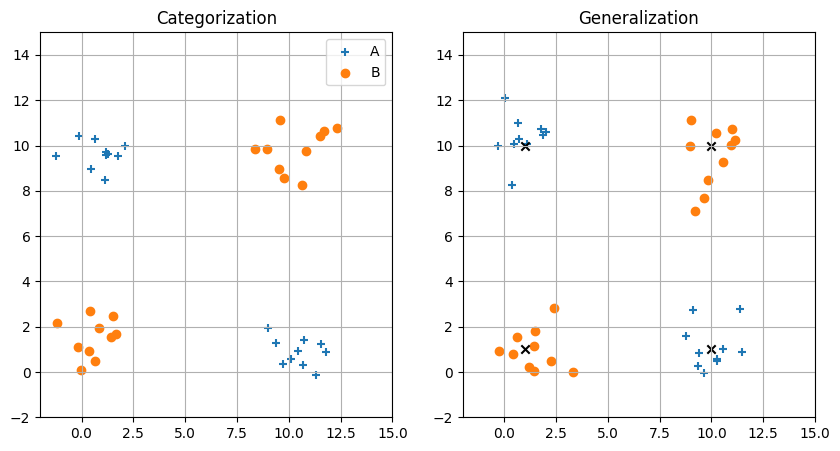

In [7]:
# Example of loading data and calling the function
stimuli = np.load('stimuli1.npy', allow_pickle=True).item()
XAC = stimuli['XAC'] # Training Cat A, width of nose
XBC = stimuli['XBC'] # Training Cat B, distance between nose & math
XAR = stimuli['XAR'] # Test Cat A
XBR = stimuli['XBR'] # Test Cat B
P = stimuli['P']

print(P)

plot_stimuli(XAC, XBC, XAR, XBR, P)

[[ 1  1]
 [ 2 10]
 [ 9  1]
 [10  9]]


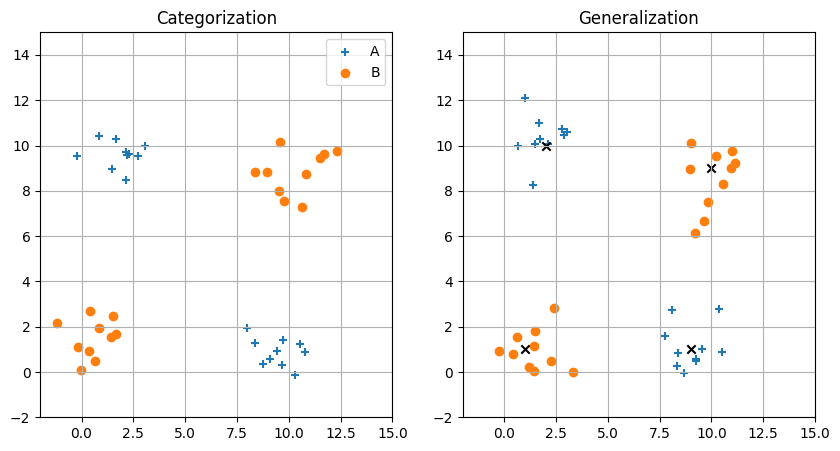

In [4]:
# Example of loading data and calling the function
stimuli = np.load('stimuli2.npy', allow_pickle=True).item()
XAC = stimuli['XAC']
XBC = stimuli['XBC']
XAR = stimuli['XAR']
XBR = stimuli['XBR']
P = stimuli['P']

print(P)

plot_stimuli(XAC, XBC, XAR, XBR, P)
